In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functools as ft
from scipy.linalg import expm
from scipy.stats import unitary_group

# Projected mixed state ensembles: Model 2

In [2]:
# Parameters
N_A = 1
N_B = 1
N = N_A + N_B

def random_state(d):
    '''Produces a Haar random state in d-dimensional Hilbert space as a numpy array.'''
    U = unitary_group.rvs(d)
    psi0 = np.zeros(d, dtype='complex128')
    psi0[0] = 1
    
    return U @ psi0

def Hamming(str_a, str_b):
    '''Returns the Hamming distance of two equal length strings'''
    Hamming = 0
    for i in range(len(str_a)):
        if str_a[i] != str_b[i]:
            Hamming += 1
    return Hamming

def bitstring(i, N_B):
    '''Returns the bitstring of N_B bits that corresponds to the base-10 integer i, for i between 0 and 2**N_B.'''
    return format(i, f'0{N_B}b')

def error_prob(m, m_prime, N_B, p):
    '''
    For single independent bitflip errors with probability p, returns the probability of reading m_prime for a true outcome m,
    for m and m_prime input as base-10 integers between 0 and 2**N_B.
    '''
    str_m = format(m, f'0{N_B}b')
    str_m_prime = format(m_prime, f'0{N_B}b')
    num_errors = Hamming(str_m, str_m_prime)
    prob = (p ** num_errors) * ((1-p) ** (N_B - num_errors))

    return prob

# From previous work: get projected ensemble on A from a state in AB

def Get_PrEns(Psi, N_A, N_B):
    PrEns = np.empty((2**N_B, 2)).tolist()

    for i in range(2**N_B):
        PsiA = Psi.reshape(2**N_A, 2**N_B)[:,i]
        PrEns[i][0] = np.linalg.norm(PsiA) ** 2
        PrEns[i][1] = PsiA / np.linalg.norm(PsiA)
    
    return PrEns

def Get_MixEns(PrEns, N_A, N_B, p):
    '''From a pure ensemble, return a mixed ensemble given an independent bitflip error p'''
    MixEns = np.empty((2 ** N_B, 2)).tolist()

    for m_prime in range(2 ** N_B):
        rho = np.zeros((2 ** N_A, 2 ** N_A), dtype='complex128')
        p_m_prime = 0

        for m in range(2 ** N_B):
            cond_prob = error_prob(m, m_prime, N_B, p)
            p_m_prime += cond_prob * PrEns[m][0]
            rho += cond_prob * np.outer(np.conjugate(PrEns[m][1]), PrEns[m][1])

        MixEns[m_prime][0] = p_m_prime
        MixEns[m_prime][1] = rho

    return MixEns

## Experiment 1: spread of first four moments

For fixed $N_A$, $N_B$ and $q$, let's look at the first three moments of the mixed ensemble and how they vary between random states $\ket{\Psi^{AB}}$. I used three probabilities $q$: $0.05$, $0.2$ and $0.5$. I considered six combinations $(N_A, N_B) \in \{ (1,1), (1,2), (2,1), (2,2), (1,5), (5,1) \}$. I used $100,000$ random states for all except $(N_A, N_B) = (1,5)$, for which I used only $10,000$ repetitions.

In [3]:
'''
N_A = 1
N_B = 1
qs = [0.05,0.2,0.5]
reps = 100000

traces_11 = np.zeros((3,reps))
purities_11 = np.zeros((3,reps))
thirds_11 = np.zeros((3,reps))

for rep in range(reps):
    Psi = random_state(2**(N_A + N_B))
    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
    
    for i, q in enumerate(qs):
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        trace = 0
        purity = 0
        third = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
            third += p * np.trace(rho @ rho @ rho)
            
        traces_11[i][rep] = np.real(trace)
        purities_11[i][rep] = np.real(purity)
        thirds_11[i][rep] = np.real(third)


N_A = 1
N_B = 2
qs = [0.05,0.2,0.5]
reps = 100000

traces_12 = np.zeros((3,reps))
purities_12 = np.zeros((3,reps))
thirds_12 = np.zeros((3,reps))

for rep in range(reps):
    Psi = random_state(2**(N_A + N_B))
    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
    
    for i, q in enumerate(qs):
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        trace = 0
        purity = 0
        third = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
            third += p * np.trace(rho @ rho @ rho)
            
        traces_12[i][rep] = np.real(trace)
        purities_12[i][rep] = np.real(purity)
        thirds_12[i][rep] = np.real(third)


N_A = 2
N_B = 1
qs = [0.05,0.2,0.5]
reps = 100000

traces_21 = np.zeros((3,reps))
purities_21 = np.zeros((3,reps))
thirds_21 = np.zeros((3,reps))

for rep in range(reps):
    Psi = random_state(2**(N_A + N_B))
    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
    
    for i, q in enumerate(qs):
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        trace = 0
        purity = 0
        third = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
            third += p * np.trace(rho @ rho @ rho)
            
        traces_21[i][rep] = np.real(trace)
        purities_21[i][rep] = np.real(purity)
        thirds_21[i][rep] = np.real(third)


N_A = 2
N_B = 2
qs = [0.05,0.2,0.5]
reps = 100000

traces_22 = np.zeros((3,reps))
purities_22 = np.zeros((3,reps))
thirds_22 = np.zeros((3,reps))

for rep in range(reps):
    Psi = random_state(2**(N_A + N_B))
    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
    
    for i, q in enumerate(qs):
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        trace = 0
        purity = 0
        third = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
            third += p * np.trace(rho @ rho @ rho)
            
        traces_22[i][rep] = np.real(trace)
        purities_22[i][rep] = np.real(purity)
        thirds_22[i][rep] = np.real(third)


N_A = 1
N_B = 5
qs = [0.05,0.2,0.5]
reps = 10000

traces_15 = np.zeros((3,reps))
purities_15 = np.zeros((3,reps))
thirds_15 = np.zeros((3,reps))

for rep in range(reps):
    Psi = random_state(2**(N_A + N_B))
    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
    
    for i, q in enumerate(qs):
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        trace = 0
        purity = 0
        third = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
            third += p * np.trace(rho @ rho @ rho)
            
        traces_15[i][rep] = np.real(trace)
        purities_15[i][rep] = np.real(purity)
        thirds_15[i][rep] = np.real(third)

N_A = 5
N_B = 1
qs = [0.05,0.2,0.5]
reps = 100000

traces_51 = np.zeros((3,reps))
purities_51 = np.zeros((3,reps))
thirds_51 = np.zeros((3,reps))

for rep in range(reps):
    Psi = random_state(2**(N_A + N_B))
    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
    
    for i, q in enumerate(qs):
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        trace = 0
        purity = 0
        third = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
            third += p * np.trace(rho @ rho @ rho)
            
        traces_51[i][rep] = np.real(trace)
        purities_51[i][rep] = np.real(purity)
        thirds_51[i][rep] = np.real(third)

np.savez('Histogram_data',
         traces_11 = traces_11,
         purities_11 = purities_11,
         thirds_11 = thirds_11,
         traces_21 = traces_21,
         purities_21 = purities_21,
         thirds_21 = thirds_21,
         traces_12 = traces_12,
         purities_12 = purities_12,
         thirds_12 = thirds_12,
         traces_22 = traces_22,
         purities_22 = purities_22,
         thirds_22 = thirds_22,
         traces_15 = traces_15,
         purities_15 = purities_15,
         thirds_15 = thirds_15,
         traces_51 = traces_51,
         purities_51 = purities_51,
         thirds_51 = thirds_51)
        '''

"\nN_A = 1\nN_B = 1\nqs = [0.05,0.2,0.5]\nreps = 100000\n\ntraces_11 = np.zeros((3,reps))\npurities_11 = np.zeros((3,reps))\nthirds_11 = np.zeros((3,reps))\n\nfor rep in range(reps):\n    Psi = random_state(2**(N_A + N_B))\n    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)\n    \n    for i, q in enumerate(qs):\n        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)\n\n        trace = 0\n        purity = 0\n        third = 0\n\n        for j in range(len(Mixed_ensemble)):\n            p = Mixed_ensemble[j][0]\n            rho = Mixed_ensemble[j][1]\n            trace += p * np.trace(rho)\n            purity += p * np.trace(rho @ rho)\n            third += p * np.trace(rho @ rho @ rho)\n            \n        traces_11[i][rep] = np.real(trace)\n        purities_11[i][rep] = np.real(purity)\n        thirds_11[i][rep] = np.real(third)\n\n\nN_A = 1\nN_B = 2\nqs = [0.05,0.2,0.5]\nreps = 100000\n\ntraces_12 = np.zeros((3,reps))\npurities_12 = np.zeros((3,reps))\nthirds_12 = np.ze

"\ncounts_third11a, bins_third11a = np.histogram(Histogram_data['thirds_11'][0], 200)\naxes[1,0].stairs(counts_third11a, bins_third11a)\naxes[1,0].set_xlim(0.15,1.05)\naxes[1,0].set_ylabel('counts')\naxes[1,0].set_xlabel('third moment')\n\ncounts_third11b, bins_third11b = np.histogram(Histogram_data['thirds_11'][1], 200)\naxes[1,1].stairs(counts_third11b, bins_third11b)\naxes[1,1].set_xlim(0.15,1.05)\naxes[1,1].set_xlabel('third moment')\n\ncounts_third11c, bins_third11c = np.histogram(Histogram_data['thirds_11'][2], 200)\naxes[1,2].stairs(counts_third11c, bins_third11c)\naxes[1,2].set_xlim(0.15,1.05)\naxes[1,2].set_xlabel('third moment')\n"

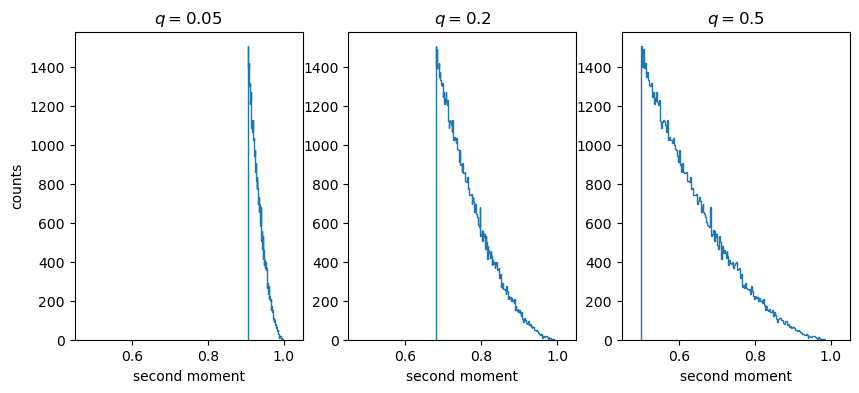

In [4]:
Histogram_data = np.load('Histogram_data.npz')
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,4))

counts_purity11a, bins_purity11a = np.histogram(Histogram_data['purities_21'][0], 200)
axes[0].stairs(counts_purity11a, bins_purity11a)
axes[0].set_xlim(0.45,1.05)
axes[0].set_ylabel('counts')
axes[0].set_xlabel('second moment')
axes[0].set_title('$q = 0.05$')

counts_purity11b, bins_purity11b = np.histogram(Histogram_data['purities_21'][1], 200)
axes[1].stairs(counts_purity11b, bins_purity11b)
axes[1].set_xlim(0.45,1.05)
axes[1].set_xlabel('second moment')
axes[1].set_title('$q = 0.2$')

counts_purity11c, bins_purity11c = np.histogram(Histogram_data['purities_21'][2], 200)
axes[2].stairs(counts_purity11c, bins_purity11c)
axes[2].set_xlim(0.45,1.05)
axes[2].set_xlabel('second moment')
axes[2].set_title('$q = 0.5$')

'''
counts_third11a, bins_third11a = np.histogram(Histogram_data['thirds_11'][0], 200)
axes[1,0].stairs(counts_third11a, bins_third11a)
axes[1,0].set_xlim(0.15,1.05)
axes[1,0].set_ylabel('counts')
axes[1,0].set_xlabel('third moment')

counts_third11b, bins_third11b = np.histogram(Histogram_data['thirds_11'][1], 200)
axes[1,1].stairs(counts_third11b, bins_third11b)
axes[1,1].set_xlim(0.15,1.05)
axes[1,1].set_xlabel('third moment')

counts_third11c, bins_third11c = np.histogram(Histogram_data['thirds_11'][2], 200)
axes[1,2].stairs(counts_third11c, bins_third11c)
axes[1,2].set_xlim(0.15,1.05)
axes[1,2].set_xlabel('third moment')
'''


## Experiment 2: empirical Haar moments as a function of $q$

In [5]:
N_A = 1
N_B = 1
reps = 10000
qs = np.linspace(0,1,50)

traces_11 = np.zeros(50)
purities_11 = np.zeros(50)
thirds_11 = np.zeros(50)

for i, q in enumerate(qs):
    avg_trace = 0
    avg_purity = 0
    avg_third = 0
    for rep in range(reps):
        Psi = random_state(2**(N_A + N_B))
        Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        trace = 0
        purity = 0
        third = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
            third += p * np.trace(rho @ rho @ rho)
        
        avg_trace += np.real(trace) / reps
        avg_purity += np.real(purity) / reps
        avg_third += np.real(third) / reps
    
    traces_11[i] = avg_trace
    purities_11[i] = avg_purity
    thirds_11[i] = avg_third


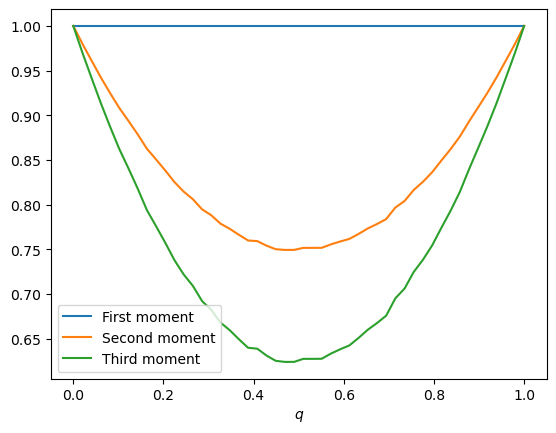

In [6]:
fig = plt.figure()
plt.plot(qs, traces_11, label='First moment')
plt.plot(qs, purities_11, label='Second moment')
plt.plot(qs, thirds_11, label='Third moment')
plt.xlabel('$q$')
plt.legend()
plt.show()

1000 reps for 12 and 21, 500 reps for 22, 100 reps for 51 and 15

In [7]:
N_A = 2
N_B = 1
reps = 4000
qs = np.linspace(0,1,50)

purities_21 = np.zeros(50)


for i, q in enumerate(qs):
    avg_purity = 0
    for rep in range(reps):
        Psi = random_state(2**(N_A + N_B))
        Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        purity = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            purity += p * np.trace(rho @ rho)
        
        avg_purity += np.real(purity) / reps
    
    purities_21[i] = avg_purity


N_A = 1
N_B = 2
reps = 4000
qs = np.linspace(0,1,50)

purities_12 = np.zeros(50)


for i, q in enumerate(qs):
    avg_purity = 0
    for rep in range(reps):
        Psi = random_state(2**(N_A + N_B))
        Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        purity = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
        
        avg_purity += np.real(purity) / reps
    
    purities_12[i] = avg_purity

N_A = 2
N_B = 2
reps = 2000
qs = np.linspace(0,1,50)

purities_22 = np.zeros(50)


for i, q in enumerate(qs):
    avg_purity = 0
    for rep in range(reps):
        Psi = random_state(2**(N_A + N_B))
        Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        purity = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
        
        avg_purity += np.real(purity) / reps
    
    purities_22[i] = avg_purity

N_A = 1
N_B = 5
reps = 400
qs = np.linspace(0,1,50)

purities_15 = np.zeros(50)


for i, q in enumerate(qs):
    avg_purity = 0
    for rep in range(reps):
        Psi = random_state(2**(N_A + N_B))
        Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        purity = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
        
        avg_purity += np.real(purity) / reps
    
    purities_15[i] = avg_purity

N_A = 5
N_B = 1
reps = 400
qs = np.linspace(0,1,50)

purities_51 = np.zeros(50)


for i, q in enumerate(qs):
    avg_purity = 0
    for rep in range(reps):
        Psi = random_state(2**(N_A + N_B))
        Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
        Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

        purity = 0

        for j in range(len(Mixed_ensemble)):
            p = Mixed_ensemble[j][0]
            rho = Mixed_ensemble[j][1]
            trace += p * np.trace(rho)
            purity += p * np.trace(rho @ rho)
        
        avg_purity += np.real(purity) / reps
    
    purities_51[i] = avg_purity


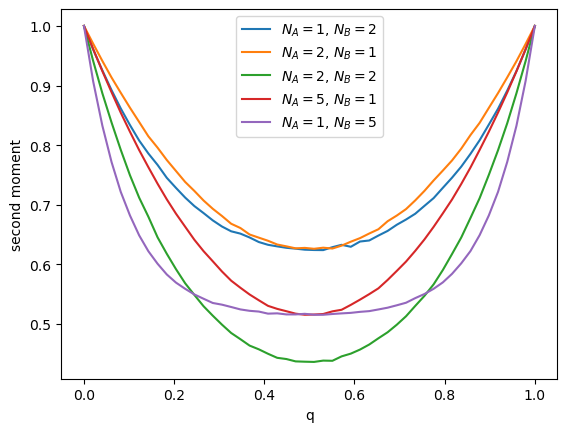

In [8]:
fig = plt.figure()
plt.plot(qs, purities_12, label='$N_A = 1$, $N_B = 2$')
plt.plot(qs, purities_21, label='$N_A = 2$, $N_B = 1$')
plt.plot(qs, purities_22, label='$N_A = 2$, $N_B = 2$')
plt.plot(qs, purities_51, label='$N_A = 5$, $N_B = 1$')
plt.plot(qs, purities_15, label='$N_A = 1$, $N_B = 5$')
plt.legend(loc='upper center')
plt.xlabel('q')
plt.ylabel('second moment')
plt.show()

## Experiment 3: higher moments

Fix one set of values $(N_A, N_B, q)$ and go up to higher moments, see what information lies there.

In [9]:
'''
N_A = 3
N_B = 7
q = 0.1
reps = 10000

traces_1 = np.zeros(reps)
purities_1 = np.zeros(reps)
thirds_1 = np.zeros(reps)
fourths_1 = np.zeros(reps)
fifths_1 = np.zeros(reps)
sixths_1 = np.zeros(reps)
sevenths_1 = np.zeros(reps)

for rep in range(reps):
    Psi = random_state(2**(N_A + N_B))
    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
    
    
    Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

    trace = 0
    purity = 0
    third = 0
    fourth = 0
    fifth = 0
    sixth = 0
    seventh = 0

    for j in range(len(Mixed_ensemble)):
        p = Mixed_ensemble[j][0]
        rho = Mixed_ensemble[j][1]
        trace += p * np.trace(rho)
        purity += p * np.trace(rho @ rho)
        third += p * np.trace(rho @ rho @ rho)
        fourth += p * np.trace(rho @ rho @ rho @ rho)
        fifth += p * np.trace(rho @ rho @ rho @ rho @ rho)
        sixth += p * np.trace(rho @ rho @ rho @ rho @ rho @ rho)
        seventh += p * np.trace(rho @ rho @ rho @ rho @ rho @ rho @ rho)
            
    traces_1[rep] = np.real(trace)
    purities_1[rep] = np.real(purity)
    thirds_1[rep] = np.real(third)
    fourths_1[rep] = np.real(fourth)
    fifths_1[rep] = np.real(fifth)
    sixths_1[rep] = np.real(sixth)
    sevenths_1[rep] = np.real(seventh)

np.savez('High_moments',
         traces=traces,
         purities=purities,
         thirds=thirds,
         fourths=fourths,
         fifths=fifths,
         sixths=sixths,
         sevenths=sevenths)
'''

"\nN_A = 3\nN_B = 7\nq = 0.1\nreps = 10000\n\ntraces_1 = np.zeros(reps)\npurities_1 = np.zeros(reps)\nthirds_1 = np.zeros(reps)\nfourths_1 = np.zeros(reps)\nfifths_1 = np.zeros(reps)\nsixths_1 = np.zeros(reps)\nsevenths_1 = np.zeros(reps)\n\nfor rep in range(reps):\n    Psi = random_state(2**(N_A + N_B))\n    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)\n    \n    \n    Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)\n\n    trace = 0\n    purity = 0\n    third = 0\n    fourth = 0\n    fifth = 0\n    sixth = 0\n    seventh = 0\n\n    for j in range(len(Mixed_ensemble)):\n        p = Mixed_ensemble[j][0]\n        rho = Mixed_ensemble[j][1]\n        trace += p * np.trace(rho)\n        purity += p * np.trace(rho @ rho)\n        third += p * np.trace(rho @ rho @ rho)\n        fourth += p * np.trace(rho @ rho @ rho @ rho)\n        fifth += p * np.trace(rho @ rho @ rho @ rho @ rho)\n        sixth += p * np.trace(rho @ rho @ rho @ rho @ rho @ rho)\n        seventh += p * np.trace

10000


Text(0.5, 0, 'seventh moment')

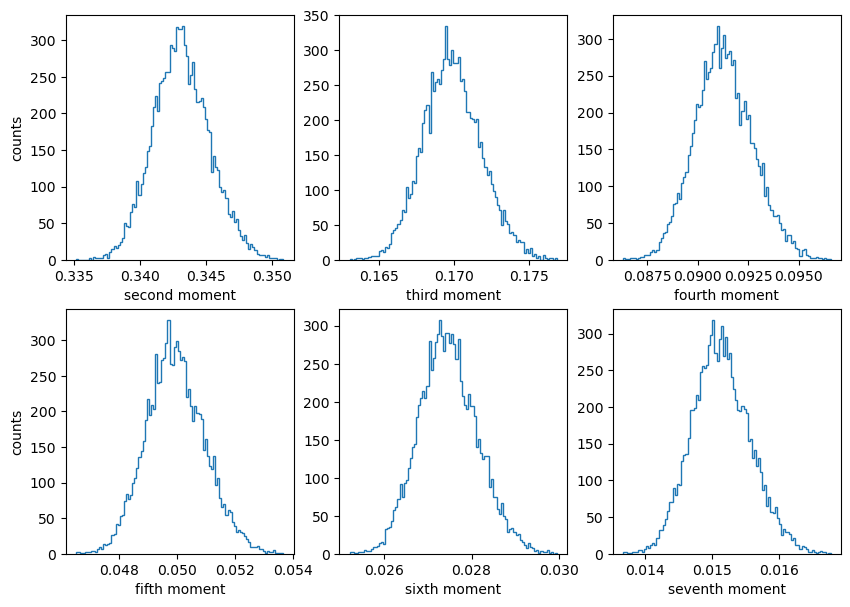

In [10]:
data = np.load('High_moments.npz')
print(np.count_nonzero(data['traces']))
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(10,7))

counts_purity, bins_purity = np.histogram(data['purities'], 100)
axes[0,0].stairs(counts_purity, bins_purity)
axes[0,0].set_ylabel('counts')
axes[0,0].set_xlabel('second moment')

counts_third, bins_third = np.histogram(data['thirds'], 100)
axes[0,1].stairs(counts_third, bins_third)
axes[0,1].set_xlabel('third moment')

counts_fourth, bins_fourth = np.histogram(data['fourths'], 100)
axes[0,2].stairs(counts_fourth, bins_fourth)
axes[0,2].set_xlabel('fourth moment')


counts_fifth, bins_fifth = np.histogram(data['fifths'], 100)
axes[1,0].stairs(counts_fifth, bins_fifth)
axes[1,0].set_ylabel('counts')
axes[1,0].set_xlabel('fifth moment')

counts_sixth, bins_sixth = np.histogram(data['sixths'], 100)
axes[1,1].stairs(counts_sixth, bins_sixth)
axes[1,1].set_xlabel('sixth moment')

counts_seventh, bins_seventh = np.histogram(data['sevenths'], 100)
axes[1,2].stairs(counts_seventh, bins_seventh)
axes[1,2].set_xlabel('seventh moment')

## Experiment 4: uniform rotations in Hilbert space

In [23]:
# Let's make a list of random unitaries of some given size, let's say 8 by 8 (N_A = 3)
unitaries = []

for i in range(10):
    unitaries.append(unitary_group.rvs(2))

# Lists of data: for 100 random states from which we obtain projected ensembles, the frame potential and the maximum
# deviation of between the true and the rotated frame potential, for the first three moments.
reps = 10
pure_data_1 = np.zeros((reps,3))
pure_data_2 = np.zeros((reps,3))
pure_data_3 = np.zeros((reps,3))
mixed_data_1 = np.zeros((reps,3))
mixed_data_2 = np.zeros((reps,3))
mixed_data_3 = np.zeros((reps,3))

# Parameters
N_A = 1
N_B = 7
q = 0.1

In [24]:
for i in range(reps):
    # Generate mixed ensemble
    Psi = random_state(2**(N_A + N_B))
    Projected_ensemble = Get_PrEns(Psi, N_A, N_B)
    Mixed_ensemble = Get_MixEns(Projected_ensemble, N_A, N_B, q)

    pure_potential_1 = 0
    pure_rotated_potentials_1 = np.zeros(len(unitaries))
    pure_potential_2 = 0
    pure_rotated_potentials_2 = np.zeros(len(unitaries))
    pure_potential_3 = 0
    pure_rotated_potentials_3 = np.zeros(len(unitaries))
    mixed_potential_1 = 0
    mixed_rotated_potentials_1 = np.zeros(len(unitaries))
    mixed_potential_2 = 0
    mixed_rotated_potentials_2 = np.zeros(len(unitaries))
    mixed_potential_3 = 0
    mixed_rotated_potentials_3 = np.zeros(len(unitaries))
    

    for m in range(len(Mixed_ensemble)):
        p_m_mix = Mixed_ensemble[m][0]
        p_m_pure = Projected_ensemble[m][0]
        rho_m = Mixed_ensemble[m][1]
        psi_m = Projected_ensemble[m][1]
        for n in range(len(Mixed_ensemble)):
            p_n_mix = Mixed_ensemble[n][0]
            p_n_pure = Projected_ensemble[n][0]
            rho_n = Mixed_ensemble[n][1]
            psi_n = Projected_ensemble[n][1]

            pure_potential_1 += p_m_pure * p_n_pure * np.absolute(np.vdot(psi_m, psi_n)) ** 2
            pure_potential_2 += p_m_pure * p_n_pure * np.absolute(np.vdot(psi_m, psi_n)) ** 4
            pure_potential_3 += p_m_pure * p_n_pure * np.absolute(np.vdot(psi_m, psi_n)) ** 6
            mixed_potential_1 += p_m_mix * p_n_mix * np.real(np.trace(rho_m @ rho_n))
            mixed_potential_2 += p_m_mix * p_n_mix * np.real(np.trace(rho_m @ rho_n)) ** 2
            mixed_potential_3 += p_m_mix * p_n_mix * np.real(np.trace(rho_m @ rho_n)) ** 3

            for j, U in enumerate(unitaries):
                pure_rotated_potentials_1[j] += p_m_mix * p_n_mix * np.absolute(np.vdot(psi_m, U @ psi_n)) ** 2
                pure_rotated_potentials_2[j] += p_m_mix * p_n_mix * np.absolute(np.vdot(psi_m, U @ psi_n)) ** 4
                pure_rotated_potentials_3[j] += p_m_mix * p_n_mix * np.absolute(np.vdot(psi_m, U @ psi_n)) ** 6
                mixed_rotated_potentials_1[j] += p_m_mix * p_n_mix * np.real(np.trace(rho_m @ U @ rho_n @ np.conjugate(np.transpose(U))))
                mixed_rotated_potentials_2[j] += p_m_mix * p_n_mix * np.real(np.trace(rho_m @ U @ rho_n @ np.conjugate(np.transpose(U)))) ** 2
                mixed_rotated_potentials_3[j] += p_m_mix * p_n_mix * np.real(np.trace(rho_m @ U @ rho_n @ np.conjugate(np.transpose(U)))) ** 3

    pure_data_1[i][0] = pure_potential_1
    pure_data_2[i][0] = pure_potential_2
    pure_data_3[i][0] = pure_potential_3
    pure_data_1[i][1] = np.max(pure_potential_1 - pure_rotated_potentials_1) / pure_potential_1
    pure_data_2[i][1] = np.max(pure_potential_2 - pure_rotated_potentials_2) / pure_potential_2
    pure_data_3[i][1] = np.max(pure_potential_3 - pure_rotated_potentials_3) / pure_potential_3
    pure_data_1[i][2] = np.average(pure_potential_1 - pure_rotated_potentials_1) / pure_potential_1
    pure_data_2[i][2] = np.average(pure_potential_2 - pure_rotated_potentials_2) / pure_potential_2
    pure_data_3[i][2] = np.average(pure_potential_3 - pure_rotated_potentials_3) / pure_potential_3
    mixed_data_1[i][0] = mixed_potential_1
    mixed_data_2[i][0] = mixed_potential_2
    mixed_data_3[i][0] = mixed_potential_3
    mixed_data_1[i][1] = np.max(mixed_potential_1 - mixed_rotated_potentials_1) / mixed_potential_1
    mixed_data_2[i][1] = np.max(mixed_potential_2 - mixed_rotated_potentials_2) / mixed_potential_2
    mixed_data_3[i][1] = np.max(mixed_potential_3 - mixed_rotated_potentials_3) / mixed_potential_3
    mixed_data_1[i][2] = np.average(mixed_potential_1 - mixed_rotated_potentials_1) / mixed_potential_1
    mixed_data_2[i][2] = np.average(mixed_potential_2 - mixed_rotated_potentials_2) / mixed_potential_2
    mixed_data_3[i][2] = np.average(mixed_potential_3 - mixed_rotated_potentials_3) / mixed_potential_3


In [28]:
print(pure_data_3)
print(mixed_data_3)

[[0.25626054 0.03329534 0.02469137]
 [0.2534954  0.02031423 0.01142878]
 [0.26876407 0.10519721 0.06164585]
 [0.25402337 0.02216391 0.01423456]
 [0.25918321 0.0418616  0.03472678]
 [0.25414239 0.02849401 0.01552801]
 [0.27179127 0.11512392 0.06995332]
 [0.25748276 0.04379697 0.02475417]
 [0.2559496  0.03234825 0.01970066]
 [0.25654773 0.03368149 0.02459767]]
[[0.13466366 0.02181827 0.01049748]
 [0.13434211 0.03097317 0.01593808]
 [0.14373247 0.14212097 0.06159075]
 [0.13494053 0.02172943 0.01012046]
 [0.13336832 0.01841198 0.00903139]
 [0.13658843 0.04042173 0.01961194]
 [0.14553668 0.14412824 0.07539194]
 [0.13798342 0.06596714 0.02687459]
 [0.13704399 0.0386651  0.01757692]
 [0.13265074 0.00386973 0.00248011]]
